In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d razinw/bird-vs-butterfly

 98% 403M/413M [00:07<00:00, 61.1MB/s]
100% 413M/413M [00:07<00:00, 58.1MB/s]


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/bird-vs-butterfly.zip','r') as zip:
  zip.extractall('/content')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_data = ImageDataGenerator(rotation_range=30,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )
test_data = ImageDataGenerator(rescale=1./255)

In [ ]:

train_datagen = train_data.flow_from_directory(
    '/content/birdvsbutterfly/train',
    target_size=(224,224),
    class_mode='binary',
    batch_size=32
)

test_datagen = test_data.flow_from_directory(
    '/content/birdvsbutterfly/test',
    target_size=(224,224),
    class_mode='binary',
    batch_size=32
)

Found 500 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224,3)
                  )

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
conv_base.trainable=False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [ ]:
history = model.fit(train_datagen, epochs=5, validation_data=test_datagen)


Epoch 1/5
16/16 [==============================] - 339s 21s/step - loss: 0.8545 - accuracy: 0.7680 - val_loss: 0.0698 - val_accuracy: 0.9800
Epoch 2/5
16/16 [==============================] - 323s 20s/step - loss: 0.2479 - accuracy: 0.9160 - val_loss: 0.0267 - val_accuracy: 0.9800
Epoch 3/5
16/16 [==============================] - 330s 21s/step - loss: 0.1233 - accuracy: 0.9520 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 4/5
16/16 [==============================] - 333s 21s/step - loss: 0.1264 - accuracy: 0.9440 - val_loss: 0.2560 - val_accuracy: 0.9000
Epoch 5/5
16/16 [==============================] - 333s 21s/step - loss: 0.0740 - accuracy: 0.9760 - val_loss: 0.1046 - val_accuracy: 0.9800


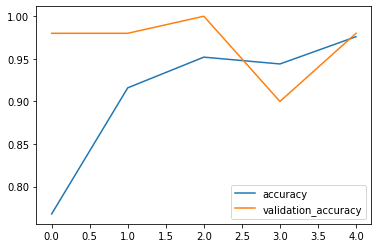

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.legend()
plt.show()


In [ ]:
conv_base.trainable=True
for layer in conv_base.layers:
  if("block5" not in layer.name):
    layer.trainable=False

In [ ]:
for layer in conv_base.layers:
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
tuned_model=Sequential()
tuned_model.add(conv_base)
tuned_model.add(Flatten())
tuned_model.add(Dense(256,activation='relu'))
tuned_model.add(Dense(1,activation='sigmoid'))

tuned_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 13,502,465
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
tuned_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [ ]:
history = tuned_model.fit(train_datagen, epochs=5, validation_data=test_datagen)

Epoch 1/5
16/16 [==============================] - 395s 25s/step - loss: 5.2893 - accuracy: 0.4660 - val_loss: 0.6914 - val_accuracy: 0.5400
Epoch 2/5
16/16 [==============================] - 382s 24s/step - loss: 0.6952 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
16/16 [==============================] - 395s 25s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
16/16 [==============================] - 379s 24s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
16/16 [==============================] - 392s 25s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model.save('cvd_model')

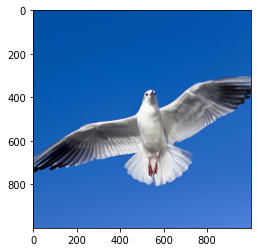

In [ ]:
img = plt.imread('/content/birdvsbutterfly/test/0/250.jpg')
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(1000, 1000, 3)

In [ ]:
import cv2

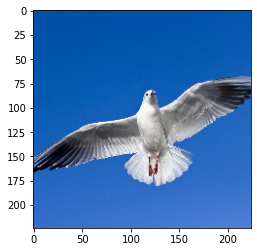

In [ ]:
img = cv2.resize(img,(224,224))
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
img = img.reshape(1,224,224,3)

In [ ]:
model.predict(img)

1/1 [==============================] - 1s 590ms/step


array([[0.01089049]], dtype=float32)

In [ ]:
tuned_model.predict(img)

1/1 [==============================] - 0s 491ms/step


array([[0.09742255]], dtype=float32)

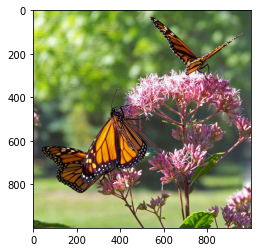

In [ ]:
img_test = plt.imread('/content/birdvsbutterfly/test/1/269.jpg')
plt.imshow(img_test)
plt.show()

In [ ]:
img_test.shape

(1000, 1000, 3)

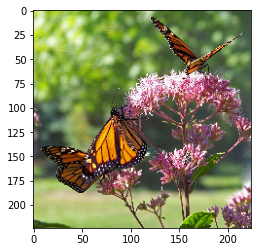

In [ ]:
img_test = cv2.resize(img_test,(224,224))
plt.imshow(img_test)
plt.show()

In [ ]:
img_test = img_test.reshape(1,224,224,3)

In [ ]:
model.predict(img_test)

1/1 [==============================] - 0s 493ms/step


array([[0.49981925]], dtype=float32)

In [ ]:
tuned_model.predict(img_test)

1/1 [==============================] - 1s 504ms/step


array([[0.4991183]], dtype=float32)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')

img_path = '/content/birdvsbutterfly/test/0/250.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n01608432', 'kite', 0.9691214), ('n02058221', 'albatross', 0.015340447), ('n01833805', 'hummingbird', 0.011540485)]
